In [1]:
library(WRS2)
library(tidyverse)
library(effsize)
library(rogme)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rogme’


The following object is masked from ‘package:WRS2’:

    pb2gen



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Stats for LPP onset for health warning stimuli
------------------------------------------------------------------

In [2]:
df<-read.csv('lat_hw.csv')

In [22]:
df

X,id,Time,Groupe,Latency
<int>,<int>,<int>,<fct>,<dbl>
0,0,1,CTR,0.4467918
1,1,1,CTR,0.3947154
2,2,1,CTR,0.4127144
3,3,1,CTR,0.3995530
4,4,1,CTR,0.3624668
5,5,1,CTR,0.3803587
6,6,1,CTR,0.3839892
7,7,1,CTR,0.3790137
8,8,1,CTR,0.3971230


In [3]:
df<-df %>% group_by(Groupe, Time)

df$Time<-factor(df$Time)

In [4]:
t2way(Latency~Groupe*Time, data=df, tr=0.2)

Call:
t2way(formula = Latency ~ Groupe * Time, data = df, tr = 0.2)

               value p.value
Groupe      110.7273   0.001
Time          7.4142   0.009
Groupe:Time 576.4612   0.001


Now running post-hoc test

In [5]:
mcp2atm(Latency~Groupe*Time, data=df)

Call:
mcp2atm(formula = Latency ~ Groupe * Time, data = df)

                psihat ci.lower ci.upper p-value
Groupe1        0.08919  0.07218  0.10621  0.0000
Time1         -0.02308 -0.04009 -0.00607  0.0088
Groupe1:Time1 -0.20352 -0.22053 -0.18650  0.0000


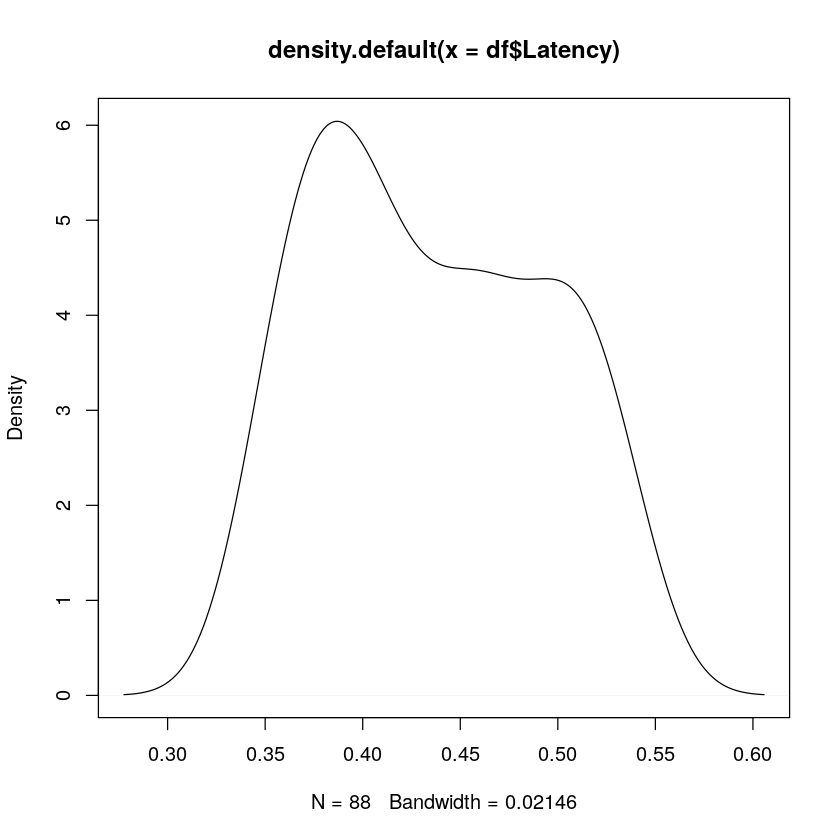

In [6]:
dens_hw<- density(df$Latency)
plot(dens_hw)

Distribution with shift function

In [7]:
df_pre<-df %>% filter(Time==1)
df_post<-df %>% filter(Time==2)

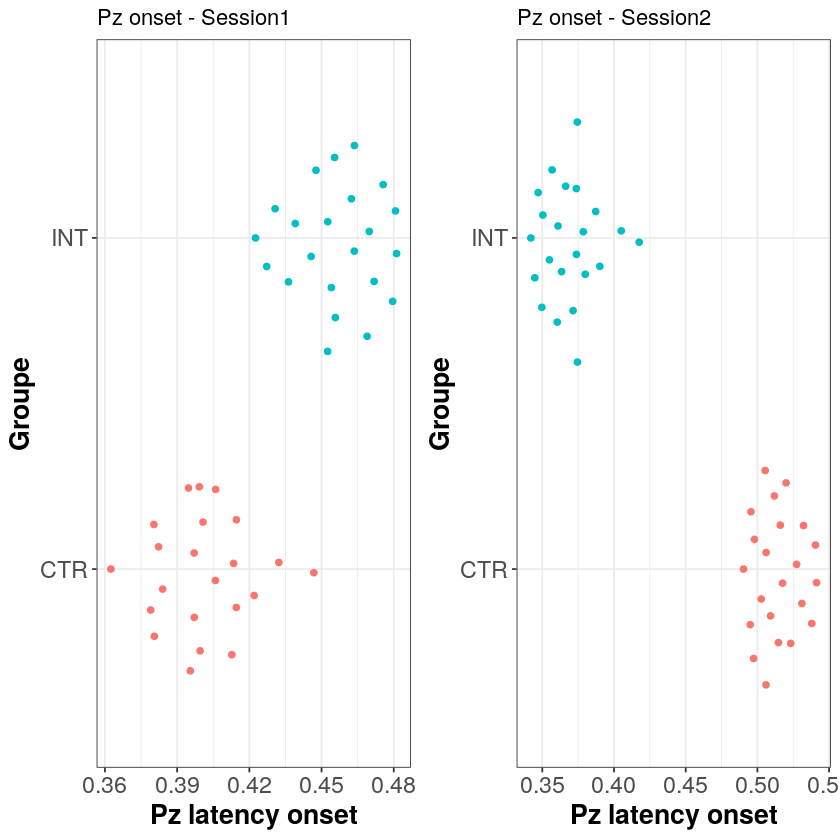

In [8]:
ps1<-plot_scat2(df_pre, 
               formula=Latency~Groupe,
               ylabel="Pz latency onset", 
               alpha=1, 
               shape=21
              
              )
ps1<-ps1+coord_flip()
ps1<- ps1+ggtitle('Pz onset - Session1')

ps2<-plot_scat2(df_post, 
               formula=Latency~Groupe,
               ylabel="Pz latency onset", 
               alpha=1, 
               shape=21
              
              )
ps2<-ps2+coord_flip()
ps2<- ps2+ggtitle('Pz onset - Session2')

grid.arrange(ps1, ps2, ncol=2)

Stats for LPP onset for Negative stimuli
-------------------------------------------------------------

In [31]:
df_neg<-read.csv('lat_neg.csv')

df_neg<-df_neg %>% group_by(Groupe, Time)

df_neg$Time<-factor(df_neg$Time)

In [31]:
t2way(Latency~Groupe*Time, data=df_neg, tr=0.2)

Call:
t2way(formula = Latency ~ Groupe * Time, data = df_neg, tr = 0.2)

                value p.value
Groupe       101.5437   0.001
Time        2814.2858   0.001
Groupe:Time  176.9068   0.001


In [32]:
mcp2atm(Latency~Groupe*Time, data=df_neg)

Call:
mcp2atm(formula = Latency ~ Groupe * Time, data = df_neg)

                psihat ci.lower ci.upper p-value
Groupe1       -0.08832 -0.10601 -0.07063       0
Time1         -0.46494 -0.48263 -0.44725       0
Groupe1:Time1  0.11657  0.09888  0.13426       0


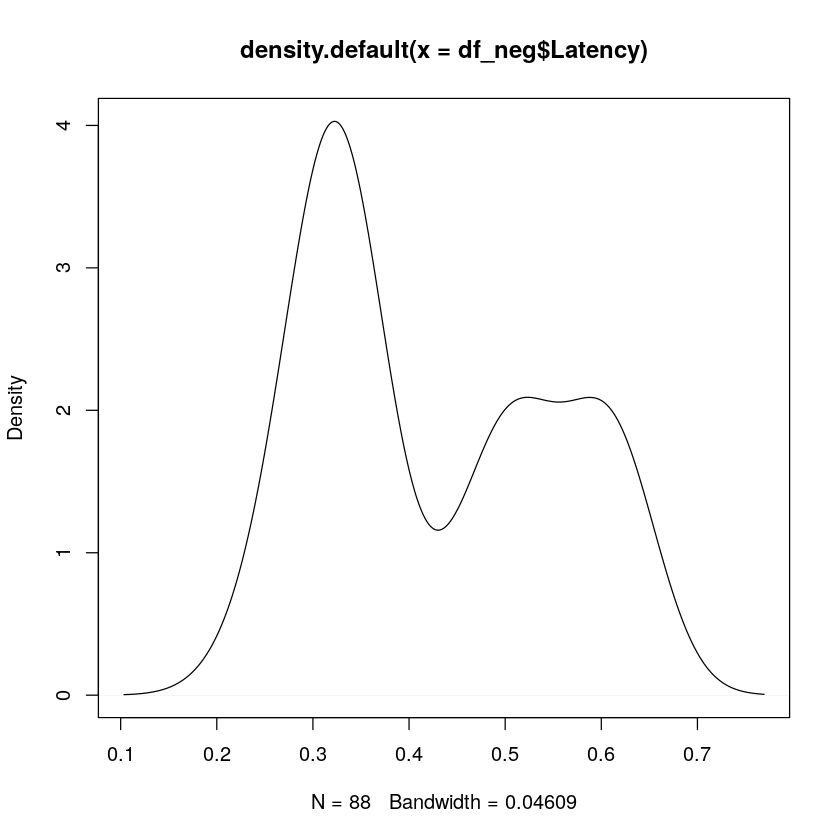

In [38]:
dens<- density(df_neg$Latency)
plot(dens)

In [32]:
df_neg_pre<-df_neg %>% filter(Time==1)
df_neg_post<-df_neg %>% filter(Time==2)

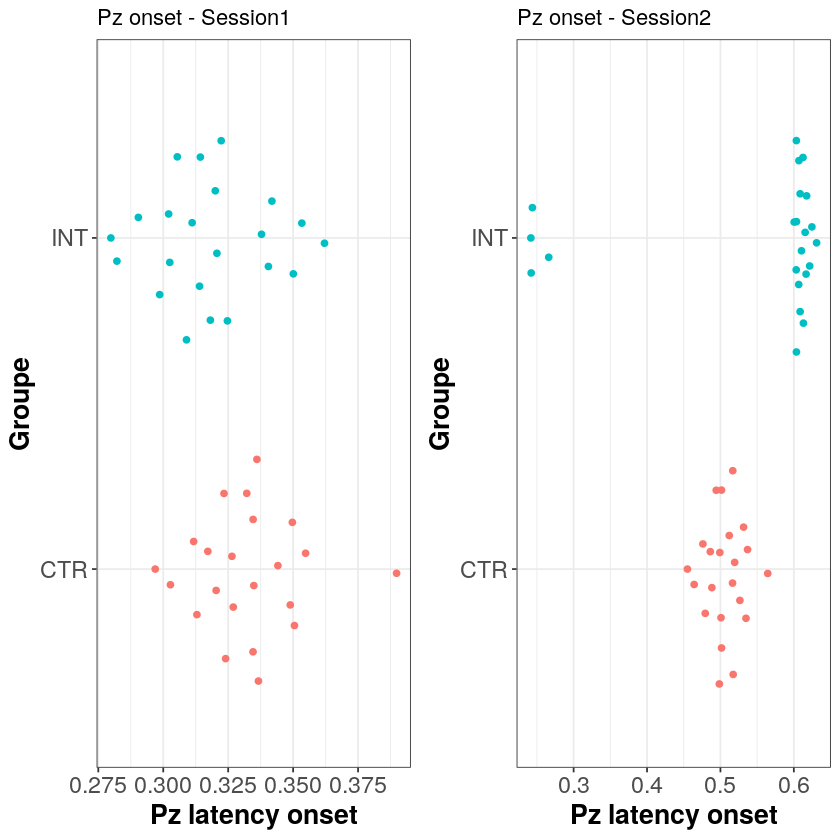

In [33]:
ps1<-plot_scat2(df_neg_pre, 
               formula=Latency~Groupe,
               ylabel="Pz latency onset", 
               alpha=1, 
               shape=21
              
              )
ps1<-ps1+coord_flip()
ps1<- ps1+ggtitle('Pz onset - Session1')

ps2<-plot_scat2(df_neg_post, 
               formula=Latency~Groupe,
               ylabel="Pz latency onset", 
               alpha=1, 
               shape=21
              
              )
ps2<-ps2+coord_flip()
ps2<- ps2+ggtitle('Pz onset - Session2')

grid.arrange(ps1, ps2, ncol=2)

LPP Amplitude - Health Warning
-----------------------------------------------

In [2]:
amp_lpp<-read.csv('amp_lpp_hw.csv')

In [3]:
amp_lpp$Subjet<-factor(amp_lpp$Subject)
amp_lpp$Session<-factor(amp_lpp$Session)
amp_lpp$Groupe<-factor(amp_lpp$Groupe)

In [25]:
amp_lpp<- amp_lpp%>% group_by(Groupe, Session, Subject)


In [19]:
amp_lpp

X,time,Pz,P3,P4,Subject,Session,Groupe
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
313,252,-1.25316757,3.579502,-0.40888372,146,1,int
314,256,-1.36555083,3.541605,-0.62978516,146,1,int
315,260,-1.32862590,3.789300,-0.77165979,146,1,int
316,264,-1.17545625,4.226249,-0.83097258,146,1,int
317,268,-0.95765473,4.644677,-0.83066171,146,1,int
318,272,-0.69967210,4.859605,-0.77731012,146,1,int
319,276,-0.39600646,4.814487,-0.65653199,146,1,int
320,280,-0.04425073,4.583842,-0.46602718,146,1,int
321,284,0.32235135,4.294064,-0.24656363,146,1,int


In [26]:
t2way(Pz~Groupe*Session, data=amp_lpp, tr=0.2)

Call:
t2way(formula = Pz ~ Groupe * Session, data = amp_lpp, tr = 0.2)

                value p.value
Groupe         0.3052   0.581
Session        9.3357   0.003
Groupe:Session 1.9237   0.166


In [28]:
mcp2atm(Pz~Session*Groupe, data=amp_lpp)

Call:
mcp2atm(formula = Pz ~ Session * Groupe, data = amp_lpp)

                  psihat ci.lower ci.upper p-value
Session1         0.19935  0.07146  0.32725 0.00225
Groupe1          0.03604 -0.09185  0.16394 0.58067
Session1:Groupe1 0.09049 -0.03740  0.21839 0.16548


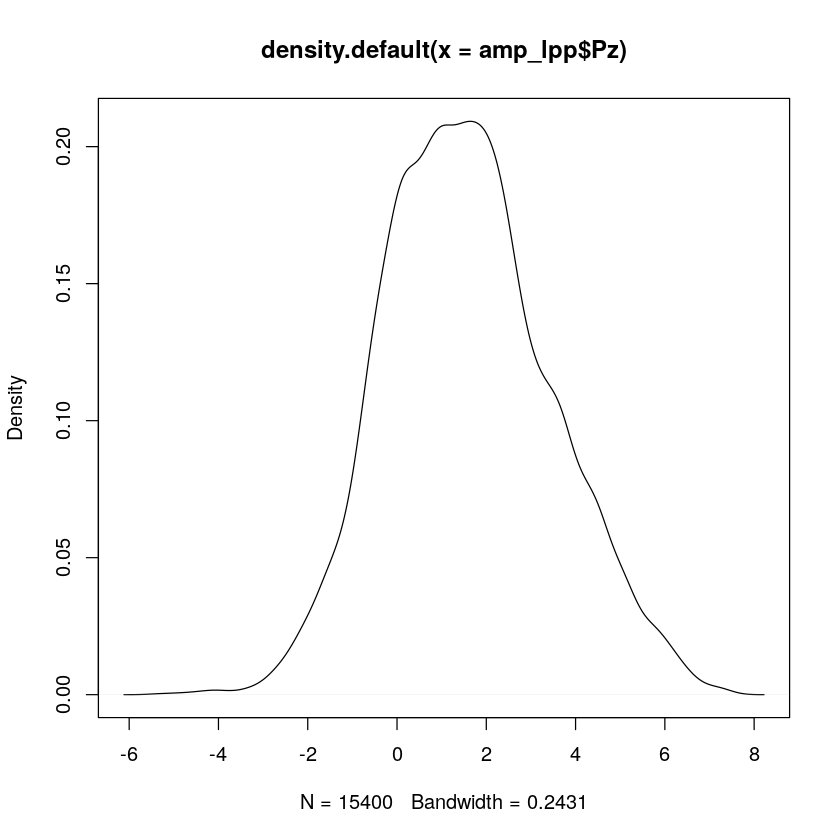

In [18]:
dens_lpp<- density(amp_lpp$Pz)
plot(dens_lpp)

Plot distributions for the 2 Groupes/ Sessions

In [14]:
amp_lpp_pre<- amp_lpp %>% filter(Session == 1)
amp_lpp_post<- amp_lpp %>% filter(Session == 2)

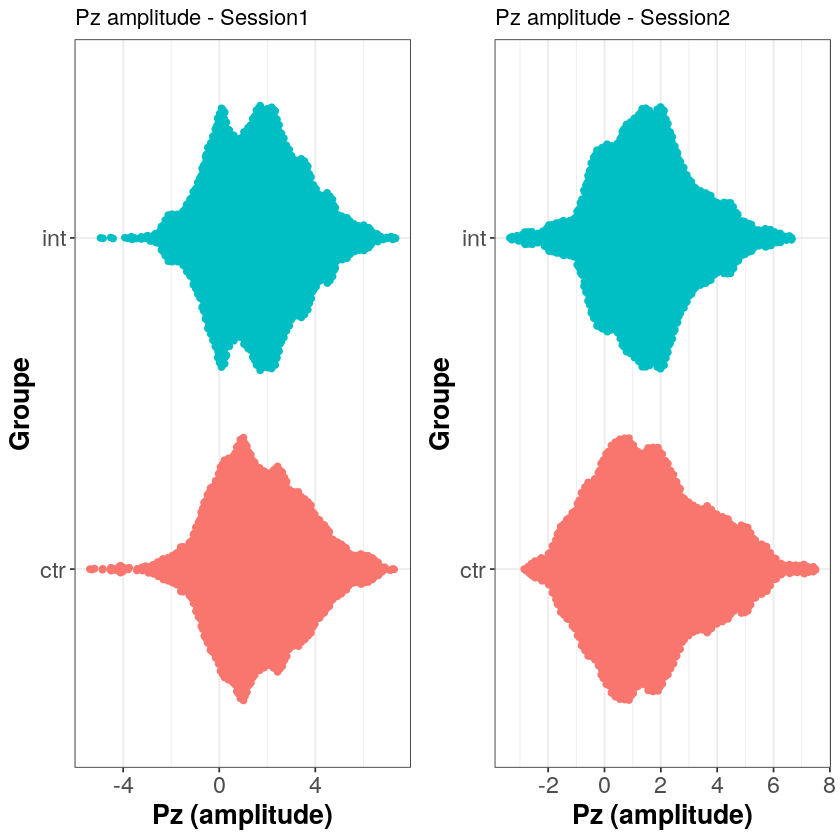

In [15]:
ps1<-plot_scat2(amp_lpp_pre, 
               formula=Pz~Groupe,
               ylabel="Pz (amplitude)", 
               alpha=1, 
               shape=21
              
              )
ps1<-ps1+coord_flip()
ps1<- ps1+ggtitle('Pz amplitude - Session1')

ps2<-plot_scat2(amp_lpp_post, 
               formula=Pz~Groupe,
               ylabel="Pz (amplitude)", 
               alpha=1, 
               shape=21
              
              )
ps2<-ps2+coord_flip()
ps2<- ps2+ggtitle('Pz amplitude - Session2')

grid.arrange(ps1, ps2, ncol=2)


In [17]:
# compute shift function
sf1<- shifthd(data=amp_lpp_pre, formula=Pz~Groupe, nboot=200)
sf2<- shifthd(data=amp_lpp_post, formula=Pz~Groupe, nboot=200)



In [18]:
# plot shift functions
psf1 <- plot_sf(sf1, plot_theme = 2)
psf2 <- plot_sf(sf2, plot_theme = 2)

Warning message:
“Using alpha for a discrete variable is not advised.”
Warning message:
“Using alpha for a discrete variable is not advised.”
Scale for 'alpha' is already present. Adding another scale for 'alpha', which
will replace the existing scale.

Warning message:
“Using alpha for a discrete variable is not advised.”
Warning message:
“Using alpha for a discrete variable is not advised.”
Scale for 'alpha' is already present. Adding another scale for 'alpha', which
will replace the existing scale.



[[1]]


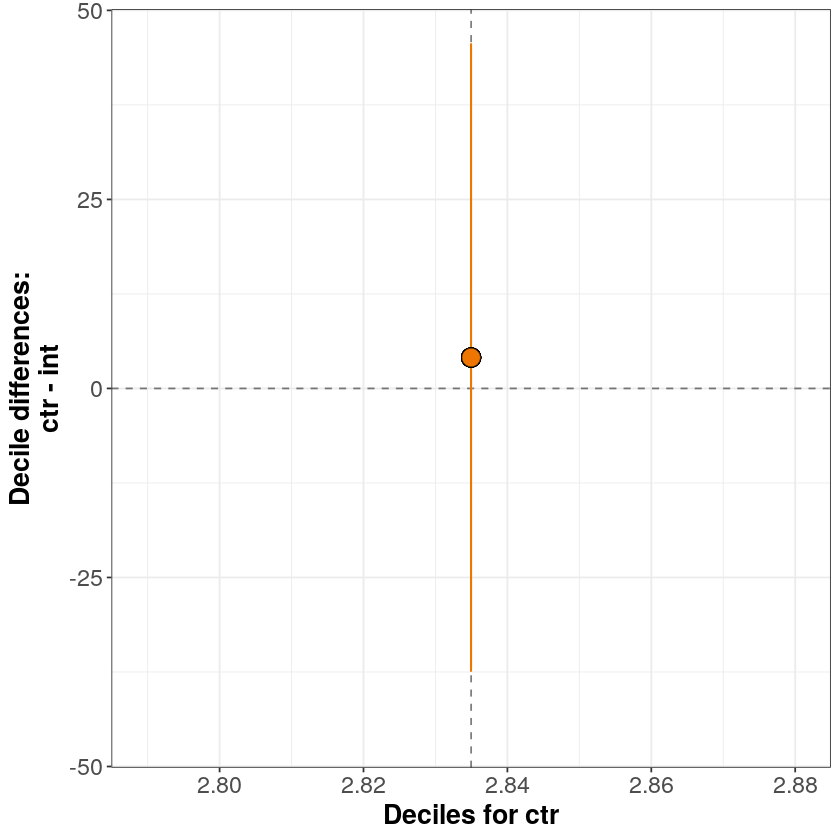

In [19]:
psf1

[[1]]


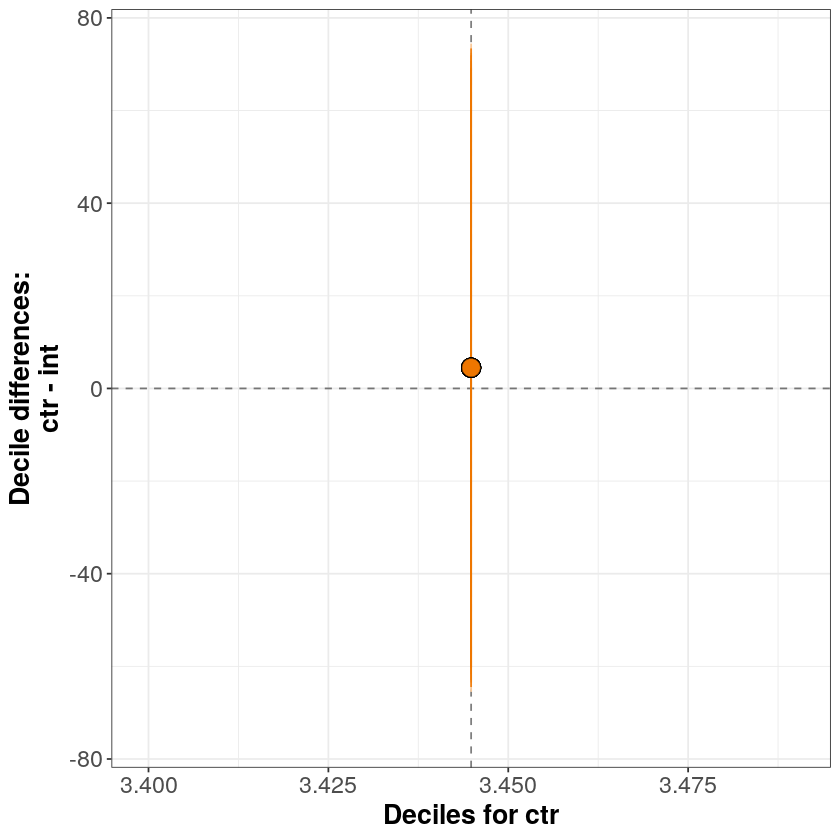

In [20]:
psf2

In [34]:
library(cowplot)
library(readr)

source("~/Documents/RainCloudPlots/tutorial_R/R_rainclouds.R")
source("~/Documents/RainCloudPlots/tutorial_R/summarySE.R")

theme_set(theme_cowplot())


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


